# Air Quality Analysis in Victoria
---------------------------------
This notebook explores air quality data collected from various monitoring stations in Victoria. The dataset includes hourly average measurements of air quality parameters. The objective of this analysis is to gain insights into the temporal trends, spatial variations, and potential impacts of air pollution on public health in Victoria.

## Import Necessary Libraries:
----------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## Load the Dataset:
--------------------

### Dataset Description

The dataset used in this analysis contains hourly average measurements of air quality parameters from various monitoring stations in Victoria. The dataset is sourced from EPA and includes the following columns:

- date: Date of observation
- time: Time of observation
- location_name: Name of the monitoring station
- latitude: Latitude coordinates of the monitoring station
- longitude: Longitude coordinates of the monitoring station
- value: Value of the observed air quality parameter
- parameter_name: Name of the observed air quality parameter

The objective of this analysis is to explore the relationship between air quality parameters and potential impacts on public health, particularly focusing on parameters such as CO (Carbon Monoxide), PM10 (Particulate Matter with diameter less than 10 micrometers), PM2.5 (Particulate Matter with diameter less than 2.5 micrometers), O3 (Ozone), and SO2 (Sulfur Dioxide). These parameters are known to have significant implications for air quality and human health.

Before proceeding with the analysis, we will load the dataset.


In [6]:
# Set display options for pandas DataFrame
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set display width

In [12]:
# Load the dataset
data = pd.read_excel('../data/2022_All_sites_air_quality_hourly_avg.xlsx', sheet_name='AllData', usecols='A:G')

# Filter the DataFrame to select only specific parameter names
selected_parameters = ['CO', 'PM10', 'PM2.5', 'O3', 'SO2']
filtered_data = data[data['parameter_name'].isin(selected_parameters)]

## Data Preprocessing:
-------------------

Before delving into detailed analysis, it's crucial to preprocess the dataset to ensure its quality and suitability for further exploration:

1. Data Conversion: Convert the 'date' column to datetime format to facilitate temporal analysis.
2. Filtering: Apply filters to select specific air quality parameters of interest for focused analysis.

By performing these preprocessing steps, we can streamline the data and focus our analysis on the relevant air quality parameters, setting the foundation for insightful exploration.


In [18]:
# Reset the index
filtered_data.reset_index(drop=True, inplace=True)

# Convert 'date' column to datetime data type
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Extract only the date portion from the datetime column
filtered_data['date'] = filtered_data['date'].dt.date

/var/folders/7p/m7gs_hkn58qbs70h8pztg9480000gn/T/ipykernel_12001/1248701647.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
/var/folders/7p/m7gs_hkn58qbs70h8pztg9480000gn/T/ipykernel_12001/1248701647.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = filtered_data['date'].dt.date


In [19]:
# Display the first few rows of the filtered DataFrame
print(filtered_data.head())

         date      time location_name   latitude   longitude   value parameter_name
0  2021-12-31  23:00:00  Morwell East -38.229393  146.424454   0.356             CO
1  2021-12-31  23:00:00   Mooroolbark -37.774967  145.328500  49.150           PM10
2  2021-12-31  23:00:00     Traralgon -38.194282  146.531464  27.504           PM10
3  2021-12-31  23:00:00     Footscray -37.803709  144.869342  33.061           PM10
4  2021-12-31  23:00:00  Morwell East -38.229393  146.424454   3.327          PM2.5


## Data Examination:
-----------------

Before conducting detailed analysis, it's essential to perform initial checks and preparations on the dataset:

1. Summary Statistics: Compute summary statistics to understand the distribution and central tendencies of the data.
2. Missing Values: Check for any missing values in the dataset and handle them appropriately.
3. Anomaly Detection: Explore the data for any unusual patterns or outliers that may require further investigation.

Let's proceed with examining the data to ensure its quality and suitability for analysis.


In [23]:
# Compute summary statistics for each parameter in 'parameter_name'
parameter_summary_stats = filtered_data.groupby(['parameter_name'])['value'].describe()

# Display summary statistics for each parameter
print("Summary Statistics by Parameter:")
print(parameter_summary_stats)


Summary Statistics by Parameter:
                  count       mean        std     min    25%     50%      75%      max
parameter_name                                                                        
CO              43966.0   0.167876   0.128603  -0.589  0.095   0.144   0.2060    1.912
O3              66467.0  16.296012   9.242939  -0.971  9.937  16.684  22.4985   66.943
PM10            56597.0  16.437867  11.658281 -19.612  9.208  13.903  20.7580  416.870
PM2.5           81045.0   5.775832   5.362307 -42.107  2.466   4.900   8.0410   96.918
SO2             49353.0   0.434215   1.719208  -5.458 -0.070   0.280   0.6780  115.233


### Insights from Summary Statistics:

1. Presence of Negative Values:
   The summary statistics reveal the presence of negative values for certain air quality parameters (e.g., CO, O3, PM10, PM2.5, SO2), indicating potential measurement errors or anomalies that require further investigation and data cleaning to ensure data quality.

2. Wide Range of Values:
   The wide range of values observed for each parameter suggests significant variability in air quality across different observations. This variability could be influenced by factors such as location, time of day, weather conditions, and human activities, highlighting the complex nature of air quality dynamics.

3. Extreme Values:
   Some parameters exhibit extreme maximum values (e.g., PM10, PM2.5, SO2), indicating the presence of outliers or highly polluted conditions in certain instances.

4. Differences in Central Tendencies:
   Notable differences in the central tendencies (mean, median) of air quality parameters indicate variations in data distribution. For example, a right-skewed distribution is observed for PM2.5 concentrations, with some high-value outliers influencing the mean.

5. Standard Deviation and Variability:
   Parameters with higher standard deviations (e.g., PM10, PM2.5) exhibit greater variability in concentrations, suggesting heterogeneous spatial and temporal patterns in air quality. This variability underscores the importance of considering local factors and temporal trends in air quality management efforts.

6. Comparative Analysis and Health Implications:
   Comparative analysis of summary statistics across parameters highlights differences in emission sources, atmospheric processes, and regional variability for various pollutants. Parameters exceeding regulatory limits or health guidelines may pose increased health risks to exposed populations, emphasizing the importance of air quality monitoring and mitigation measures.

By examining the summary statistics from various angles and considering their implications in the broader context of air quality management and public health, we can uncover valuable insights and inform evidence-based decision-making.

In [24]:
# Check for missing values
print("\nMissing values in the dataset:")
print(filtered_data.isnull().sum())


Missing values in the dataset:
date              0
time              0
location_name     0
latitude          0
longitude         0
value             0
parameter_name    0
dtype: int64


We can see there are no missing values across any of the columns.

<Figure size 2000x800 with 0 Axes>

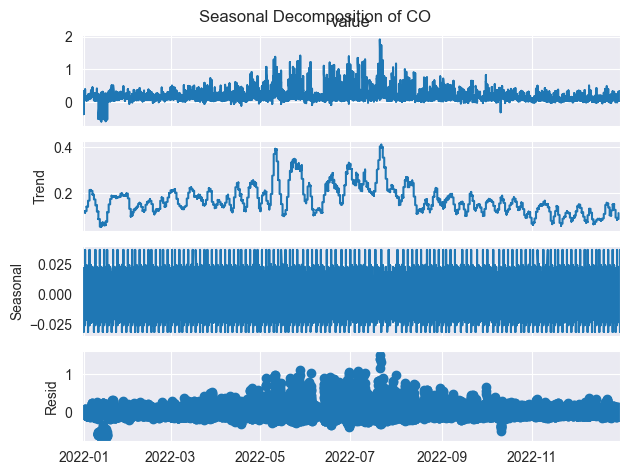

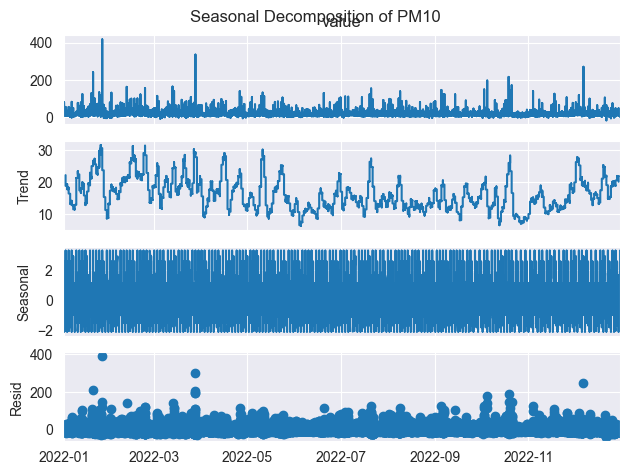

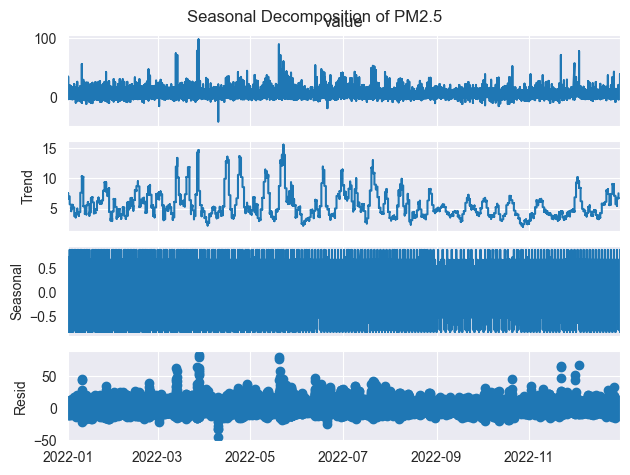

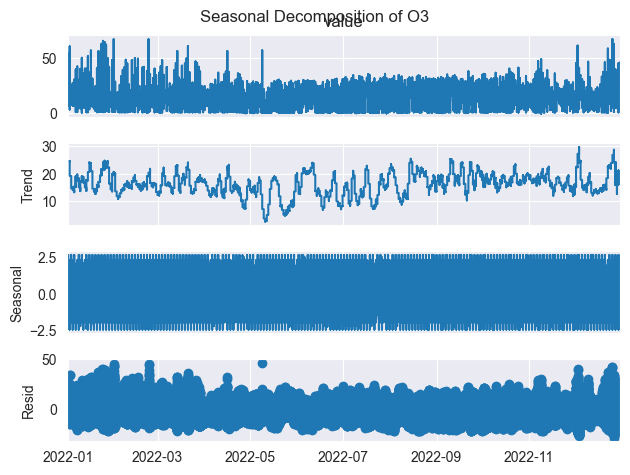

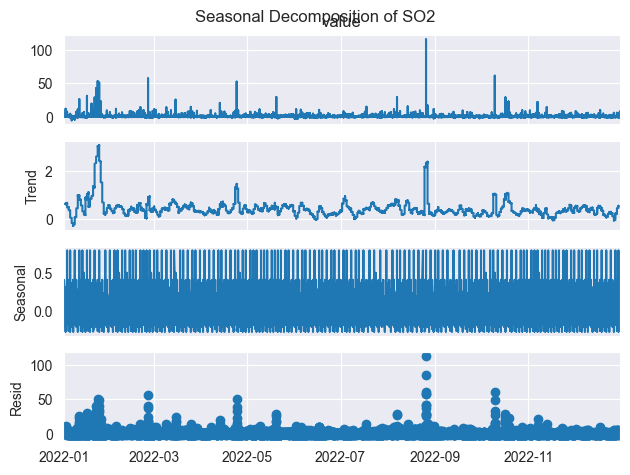

In [27]:
# Anomaly Detection
# Perform seasonal decomposition on air quality parameters to detect anomalies
plt.figure(figsize=(20, 8))
for parameter in filtered_data['parameter_name'].unique():
    parameter_data = filtered_data[filtered_data['parameter_name'] == parameter].set_index('date')['value']
    decomposition = seasonal_decompose(parameter_data, model='additive', period=365)
    decomposition.plot().suptitle(f'Seasonal Decomposition of {parameter}')
plt.show()